## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
tn = pd.read_excel("titanic.xlsx")
tn.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [15]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [16]:
tn.shape

(1309, 14)

In [17]:
tn.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [18]:
tn.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [19]:
tn.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [20]:
tn.loc[tn.isnull().any(axis=1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [21]:
# tn.dropna(thresh=500, axis=1)

tn.drop(columns = ["cabin",  "boat", "body", "home.dest"], inplace = True)

In [22]:
tn

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [26]:
tn["pclass"].replace([1, 2, 3], ["1st Class", "2nd Class", "3rd Class"], inplace = True)
tn["survived"].replace([0, 1], ["Deceased", "Survived"], inplace = True)
tn["embarked"].replace(["C", "Q", "S"], ["Cherbourg", "Queenstown", "Southampton"], inplace = True)

In [27]:
tn.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1st Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton
1,1st Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton
2,1st Class,Deceased,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton
3,1st Class,Deceased,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton
4,1st Class,Deceased,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton


In [35]:
tn["Titanic Passenger"] = 1

tn["Family Size"] = tn["sibsp"] + tn["parch"]

tn["Traveling Alone"] = np.where(tn["Family Size"] == 0, "Alone", "With Family")

tn["Has Caregiver"] = np.where((tn["Family Size"] > 0) & (tn["age"] < 13), "Has Caregiver", "No Caregiver")

tn["Crew"] = np.where(tn["fare"] == 0, "Crew", "Passenger")

In [36]:
bins = [0, 2, 13, 18, 65, 150]

bin_names = ["Infant", "Child", "Teen", "Adult", "Senior"]
tn["Age Group"] = pd.cut(tn["age"], bins, labels=bin_names)

In [37]:
tn.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Traveling Alone,Has Caregiver,Crew,Age Group
0,1st Class,Survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southampton,1,0,Alone,No Caregiver,Passenger,Adult
1,1st Class,Survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southampton,1,3,With Family,Has Caregiver,Passenger,Infant
2,1st Class,Deceased,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southampton,1,3,With Family,Has Caregiver,Passenger,Infant
3,1st Class,Deceased,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southampton,1,3,With Family,No Caregiver,Passenger,Adult
4,1st Class,Deceased,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southampton,1,3,With Family,No Caregiver,Passenger,Adult


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [39]:
tn[["pclass"]].value_counts()

pclass   
3rd Class    709
1st Class    323
2nd Class    277
dtype: int64

In [40]:
tn[["survived"]].value_counts()

survived
Deceased    809
Survived    500
dtype: int64

In [41]:
tn[["sex"]].value_counts()

sex   
male      843
female    466
dtype: int64

In [43]:
tn[["embarked"]].value_counts()

embarked   
Southampton    914
Cherbourg      270
Queenstown     123
dtype: int64

In [44]:
tn[["Traveling Alone"]].value_counts()

Traveling Alone
Alone              790
With Family        519
dtype: int64

In [45]:
tn[["Has Caregiver"]].value_counts()

Has Caregiver
No Caregiver     1218
Has Caregiver      91
dtype: int64

In [46]:
tn[["Crew"]].value_counts()

Crew     
Passenger    1292
Crew           17
dtype: int64

In [47]:
tn[["Age Group"]].value_counts()

Age Group
Adult        843
Teen          94
Child         65
Infant        34
Senior        10
dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [48]:
tn.describe()

,age,sibsp,parch,fare,Titanic Passenger,Family Size
count,1046.000000,1309.000000,1309.000000,1308.000000,1309.0,1309.000000
mean,29.881135,0.498854,0.385027,33.295479,1.0,0.883881
std,14.413500,1.041658,0.865560,51.758668,0.0,1.583639
min,0.166700,0.000000,0.000000,0.000000,1.0,0.000000
25%,21.000000,0.000000,0.000000,7.895800,1.0,0.000000
50%,28.000000,0.000000,0.000000,14.454200,1.0,0.000000
75%,39.000000,1.000000,0.000000,31.275000,1.0,1.000000
max,80.000000,8.000000,9.000000,512.329200,1.0,10.000000


In [49]:
tn.mean()

C:\Users\tatia\AppData\Local\Temp\ipykernel_29336\3342227755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tn.mean()


age                  29.881135
sibsp                 0.498854
parch                 0.385027
fare                 33.295479
Titanic Passenger     1.000000
Family Size           0.883881
dtype: float64

In [50]:
tn.mode()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Traveling Alone,Has Caregiver,Crew,Age Group
0,3rd Class,Deceased,"Connolly, Miss. Kate",male,24.0,0.0,0.0,CA. 2343,8.05,Southampton,1.0,0.0,Alone,No Caregiver,Passenger,Adult
1,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
tn.mode()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Traveling Alone,Has Caregiver,Crew,Age Group
0,3rd Class,Deceased,"Connolly, Miss. Kate",male,24.0,0.0,0.0,CA. 2343,8.05,Southampton,1.0,0.0,Alone,No Caregiver,Passenger,Adult
1,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
tn.std()

C:\Users\tatia\AppData\Local\Temp\ipykernel_29336\2162129274.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tn.std()


age                  14.413500
sibsp                 1.041658
parch                 0.865560
fare                 51.758668
Titanic Passenger     0.000000
Family Size           1.583639
dtype: float64

### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [58]:
pd.crosstab(tn["pclass"], tn["survived"], margins = True)

survived,Deceased,Survived,All
pclass,,,
1st Class,123,200,323
2nd Class,158,119,277
3rd Class,528,181,709
All,809,500,1309


In [59]:
pd.crosstab(tn["sex"], tn["survived"], margins = True)

survived,Deceased,Survived,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


In [60]:
pd.crosstab(tn["age"], tn["survived"], margins = True)

survived,Deceased,Survived,All
age,,,
0.1667,0,1,1
0.3333,1,0,1
0.4167,0,1,1
0.6667,0,1,1
0.75,1,2,3
...,...,...,...
71.0,2,0,2
74.0,1,0,1
76.0,0,1,1


In [62]:
pd.crosstab(tn["Age Group"], tn["survived"], margins = True)

survived,Deceased,Survived,All
Age Group,,,
Infant,13,21,34
Child,29,36,65
Teen,56,38,94
Adult,513,330,843
Senior,8,2,10
All,619,427,1046


In [63]:
pd.crosstab(tn["Family Size"], tn["survived"], margins = True)

survived,Deceased,Survived,All
Family Size,,,
0,551,239,790
1,109,126,235
2,69,90,159
3,13,30,43
4,16,6,22
5,20,5,25
6,12,4,16
7,8,0,8
10,11,0,11


In [66]:
pd.crosstab(tn["Traveling Alone"], tn["survived"], margins = True)

survived,Deceased,Survived,All
Traveling Alone,,,
Alone,551,239,790
With Family,258,261,519
All,809,500,1309


In [67]:
pd.crosstab(tn["Crew"], tn["survived"], margins = True)

survived,Deceased,Survived,All
Crew,,,
Crew,15,2,17
Passenger,794,498,1292
All,809,500,1309


In [68]:
pd.crosstab(tn["Has Caregiver"], tn["survived"], margins = True)

survived,Deceased,Survived,All
Has Caregiver,,,
Has Caregiver,39,52,91
No Caregiver,770,448,1218
All,809,500,1309


In [69]:
pd.crosstab(tn["fare"], tn["survived"], margins = True)

survived,Deceased,Survived,All
fare,,,
0.0,15,2,17
3.1708,0,1,1
4.0125,1,0,1
5.0,1,0,1
6.2375,1,0,1
...,...,...,...
247.5208,1,2,3
262.375,1,6,7
263.0,2,4,6


In [70]:
pd.crosstab(tn["embarked"], tn["survived"], margins = True)

survived,Deceased,Survived,All
embarked,,,
Cherbourg,120,150,270
Queenstown,79,44,123
Southampton,610,304,914
All,809,498,1307


### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

Text(0.5, 1.0, 'Passenger vs Crewmate Survival Rate')

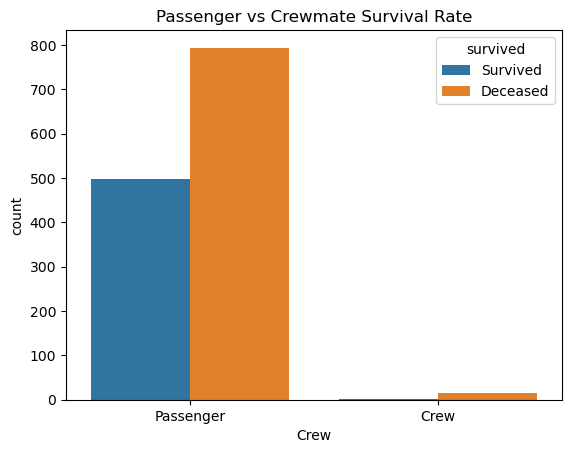

In [75]:
sns.countplot(data = tn, x = "Crew", hue = "survived")
plt.title("Passenger vs Crewmate Survival Rate")

Text(0.5, 1.0, 'Survival Based On PAssenger Class')

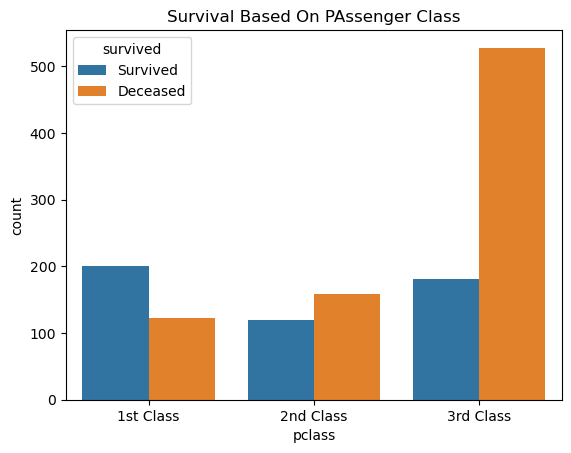

In [76]:
sns.countplot(data = tn, x = "pclass", hue = "survived")
plt.title("Survival Based On PAssenger Class")

Text(0.5, 1.0, 'Survival Rate Based on Age')

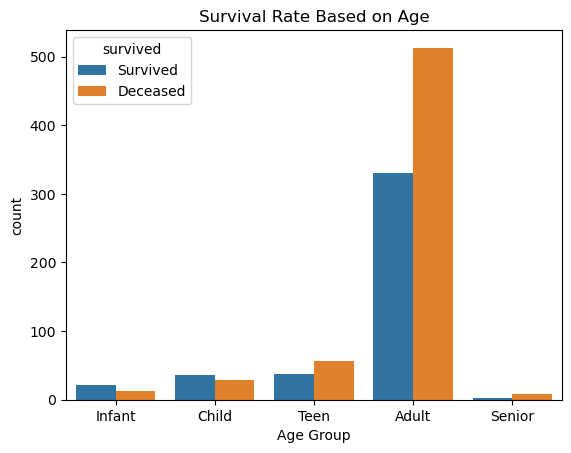

In [78]:
sns.countplot(data = tn, x = "Age Group", hue = "survived")
plt.title("Survival Rate Based on Age")

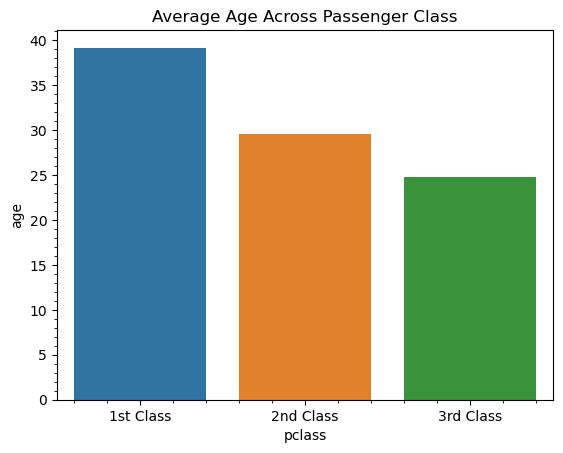

In [79]:
sns.barplot(data = tn, x = "pclass", y = "age", ci = None)
plt.title('Average Age Across Passenger Class')
plt.minorticks_on() 